 # Introduction to Data Science
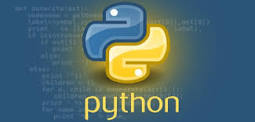
## By: Avanish Davuluri

### Note: I answered Questions 1-4 in a cell after the output of each algorithm. I answered Question 5 at the end of the document, after the Improving Accuracy & Moving Forward Section

## Initial Preprocessing

In [1]:
# *** Question 2a, 2b *** 
#Import Modules necessary for the rest of this script
import numpy as np #Not really used
import pandas as pd #For Dataframe capabilities
import matplotlib.pyplot as plt #For basic graphing later on
import seaborn as sns #Easily make matplotlib graphs look better

In [2]:
# *** Question 2a, 2b ***
#Reading file into a DataFrame
df = pd.read_excel("annual_generation_state.xls", skiprows = 1) #Excel since gov information is all excel files

In [3]:
# *** Question 2a, 2b ***
'''
Modify data so it is useful for my study by
Removing information about type of energy company, type of producer, states besides CA
'''
def adjustments(df):
    df = df.copy(deep = "True")
    df = df[df['TYPE OF PRODUCER'].str.contains('Total Electric Power Industry')] #Only have total production
    df.set_index('STATE', inplace = True) #Be able to index by state
    df.drop('TYPE OF PRODUCER', axis=1, inplace=True) #Not needed since production type is all total
    df_ca = df.loc['CA'].copy(deep = "True") #Only CA values
    return df_ca

df_ca = adjustments(df) 

In [4]:
# *** Question 2a, 2b ***
'''
My study is about the relative percentages of the different energy sources that CA uses
So, I need to have a dataframe showing relative percentages instead of the flat megawatthours in df_ca
'''
#Return percents of energy type out of total for any year in data
def calc_percs(year): 
    df_year = df_ca[df_ca['YEAR'] == year].copy(deep = "True") #Only values of that year
    df_year.set_index('ENERGY SOURCE', inplace = True) #Able to get total energy production
    df_year.drop('YEAR', axis=1, inplace=True) #Not needed since all values are for that year
    total_year = float(df_year.loc['Total']) #Total Energy Production for CA in that year
    df_raw = df_year.div(total_year, axis = 1) #Relative amount of energy production (total = 1)
    df_perc = df_raw.mul(100, axis = 1) #Covert relative amount to percentage value
    df_perc = df_perc.drop('Total')
    df_perc.sort_values(by=['GENERATION (Megawatthours)'], ascending=False, inplace = True) #sort from greatest to least
    return df_perc


all_years = pd.DataFrame() #Initialize empty dataframe

years_list = list(map(str, range(1990, 2021))) #Create list of years from 1990 - 2020
for i in range(0, len(years_list)): #Convert elements of list from str to int
    years_list[i] = int(years_list[i])
    
    
def year_en_type(energy_type): #Make dataframes of 1990 - 2020 percentages per energy type
    en_type = []
    for year in years_list:
        year_based = calc_percs(year)
        year_based = year_based.loc[energy_type]
        en_type.append(year_based)
    en_type = pd.DataFrame(en_type)
    en_type.rename(columns = {'GENERATION (Megawatthours)': energy_type}, inplace = True)
    en_type = en_type.assign(Year = years_list)
    en_type['Year'] = en_type['Year'].astype(int) #Convert year from float to int
    en_type.set_index('Year', inplace = True)
    all_years[energy_type] = en_type[energy_type]

def combine_datsets(col_names): #Combine all of the dataframes into all_years
    for name in col_names:
        year_en_type(name)

#Big Dataset for all percentages per energy type from 1990 - 2020
en_source_list = df_ca['ENERGY SOURCE'].tolist()
en_source_set = set(en_source_list)
en_source_set.remove('Total')
combine_datsets(en_source_set)
all_years = all_years.rename(columns = {'Solar Thermal and Photovoltaic':'Solar',
                                        'Hydroelectric Conventional':'Hydro'}) #Easier to Read

###  Null Values Handling
#### Doing this step here to ensure that graphs have all the right information and do not throw any errors

In [5]:
# *** Question 2 ***
#Identifying Missing values in all_types
print("Checking to see if there is any missing data:")
print("Each count of True means that there is 1 missing value for the variable under the True count")
print("")
missing_data = all_years.isnull() #Verify that all_types has no missing values
for column in missing_data.columns.values.tolist():
    print(missing_data[column].value_counts())
    print("")
print("No columns in all_types have any missing values. Congrats to the Department of Energy for being thorough with their datasets")

Checking to see if there is any missing data:
Each count of True means that there is 1 missing value for the variable under the True count

False    31
Name: Other, dtype: int64

False    31
Name: Coal, dtype: int64

False    31
Name: Wood and Wood Derived Fuels, dtype: int64

False    31
Name: Geothermal, dtype: int64

False    31
Name: Wind, dtype: int64

False    31
Name: Other Gases, dtype: int64

False    31
Name: Natural Gas, dtype: int64

False    31
Name: Petroleum, dtype: int64

False    31
Name: Other Biomass, dtype: int64

False    31
Name: Hydro, dtype: int64

False    31
Name: Pumped Storage, dtype: int64

False    31
Name: Solar, dtype: int64

False    31
Name: Nuclear, dtype: int64

No columns in all_types have any missing values. Congrats to the Department of Energy for being thorough with their datasets


In [6]:
# *** Question 2c ***
# Calculate percentage of fossil fuels vs renewable energy produced
def cat_percs(df): #Create dataframe with 2 entries (fossil fuel and renewable energy) that have percent values
    df2 = df.copy(deep = "True")
    df2['Fossil Fuels'] = df['Coal'] + df['Natural Gas'] + df['Other Gases'] + df['Petroleum'] + df['Wood and Wood Derived Fuels'] + df['Other']
    df2['Renewable Energy'] = df['Geothermal'] + df['Pumped Storage'] + df['Hydro'] + df['Nuclear'] + df['Other Biomass'] + df['Solar'] + df['Wind']
    df2 = df2.loc[:, ['Fossil Fuels', 'Renewable Energy']]
    return df2

cat_df = cat_percs(all_years)
cat_df

,Fossil Fuels,Renewable Energy
Year,,
1990,53.411716,46.588284
1991,53.292302,46.707698
1992,56.972620,43.027380
1993,49.922025,50.077975
1994,58.171998,41.828002
1995,45.676517,54.323483
1996,43.340206,56.659794
1997,47.183351,52.816649
1998,45.226570,54.773430


In [7]:
# *** Question 2c ***
# Calculate the percent change of energy production per type of energy for California between 1990 and 2020
energy_prod_1990 = calc_percs(1990) #Calculate relative energy percentages in 1990
energy_prod_2020 = calc_percs(2020) #Calculate relative energy percentages in 2020

diff = energy_prod_2020.subtract(energy_prod_1990, fill_value=0) #Difference between 2020 and 1990 values
diff_perc = diff.div(energy_prod_1990) #Get raw values
perc_inc = diff_perc.mul(100) #Get percentage values
perc_inc

,GENERATION (Megawatthours)
ENERGY SOURCE,
Coal,-90.550016
Geothermal,-32.788655
Hydroelectric Conventional,-22.850294
Natural Gas,6.563602
Nuclear,-57.297563
Other,inf
Other Biomass,6.020841
Other Gases,-38.483897
Petroleum,-99.311127


## Data Science Algorithms

### a) Linear/Non-Linear Regression
I implemented polynomial regression

3
3
3


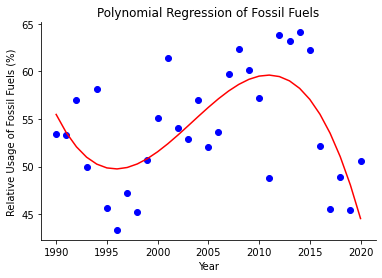

Mean absolute error: 3.88
Residual sum of squares (MSE): 21.77
R2-score: 0.41




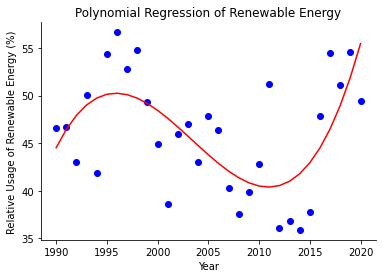

Mean absolute error: 3.88
Residual sum of squares (MSE): 21.77
R2-score: 0.41




In [8]:
# *** Question 3a ***
#Polynomial Regression
"""
After building the linear regression model, I knew that my data did not have a linear relationship. Since my
research questions are to calculate when California will be 100% powered by renewables and the relative usage of
different energy sources in that year, I knew that I needed a better regression model in order to answer my research
questions. So, I thought of polynomial regression and finding the optimal number of degrees, as I thought a
polynomial function would better fit my data.
"""
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import r2_score

cat_df.reset_index(inplace=True) #Make year a column that can be used as x axis


def train_test_poly(col, degree, opt):
    #Train/test split
    poly = PolynomialFeatures(degree= degree, include_bias=False)
    poly_reg_model = linear_model.LinearRegression()
    train_x = np.asanyarray(cat_df[['Year']])
    train_y = np.asanyarray(cat_df[[col]])
    poly_features = poly.fit_transform(train_x.reshape(-1, 1))
    poly_reg_model.fit(poly_features, train_y)
    train_y_ = poly_reg_model.predict(poly_features)
    
    if opt == True: #Only when model is optimized
        #Plot model
        plt.scatter(train_x, train_y, color='blue')
        plt.plot(train_x, train_y_, c="red")
        plt.xlabel("Year")
        plt.ylabel("Relative Usage of " + col + " (%)")
        plt.title("Polynomial Regression of " + col)
        sns.despine(right=True) #Remove line on the right
        plt.show()
        plt.close()
    
    #Test accuracy
    test_x = np.asanyarray(cat_df[['Year']])
    poly_features_test = poly.fit_transform(test_x.reshape(-1, 1))
    test_y = np.asanyarray(cat_df[[col]])
    test_y_ = poly_reg_model.predict(poly_features_test)
    
    if opt == False: #For optimizing model
        mean_absolute_error = np.mean(np.absolute(test_y_ - test_y))
        mse = np.mean((test_y_ - test_y) ** 2)
        r2 = r2_score(test_y , test_y_)
   
        return mean_absolute_error, mse, r2

    if opt == True: #Accuracy evaluation of optimized model
        print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
        print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
        print("R2-score: %.2f" % r2_score(test_y , test_y_))
        print("\n")
    
    
#Find optimal degree for polynomial
mae_list = []
mse_list = []
r2_list = []
for val in range(1, 11):
    mean_absolute_error, mse, r2 = train_test_poly('Fossil Fuels', val, False)
    mae_list.append(mean_absolute_error)
    mse_list.append(mse)
    r2_list.append(r2)
    
print(mae_list.index(min(mae_list)) + 1) #Add one because index starts at 0
print(mse_list.index(min(mse_list)) + 1)
print(r2_list.index(max(r2_list)) + 1)
    
#Do Polynomial Regression for Fossil Fuel + Renewable Energy
train_test_poly('Fossil Fuels', 3, True)
train_test_poly('Renewable Energy', 3, True)

Questions for A:

Analysis of Polynomial Regression

1. Objective and Rationale:

After building the linear regression model, I knew that my data did not have a linear relationship. Since my
research questions are to calculate when California will be 100% powered by renewables and the relative usage of
different energy sources in that year, I knew that I needed a better regression model in order to answer my research questions. So, I thought of polynomial regression and finding the optimal number of degrees, as I thought a polynomial function would better fit my data and help me answer my research question.

2. Steps of Implementing the Algorithm with regards to the context:

Because my dataset has a small sample size (30) and because I could not have any other method work, I trained the polynomial regression models with the entire training dataset. For these models, the training dataset came from the cat_df dataframe calculated ealier. The cat_df dataframe consists of the relative percentages for fossil fuels and renewable energy for CA from 1990 - 2020. Before implementing a specific model, I optimized the model by finding the optimal number of degrees for the polynomial. I did this by calculating the MAE, MSE, and R2 score for polynomial models with a degree in range(1, 11) and choosing the degree that had the minimum MAE, minimum MSE, and maximum R2 score (which turned out to be degree = 3). After finding the optimal degree, I created one polynomial regression model with this optimal degree and evaluated the accuracy of this model using the MAE, MSE, and R2 score metrics.

3. Interpretation of the results and prediction accuracy achieved:

Although the polynomial regression is more accurate than the linear regression (especially after the number of degrees was optimized to improve the accuracy), it still has an MSE of 21.77 and an R2 score of 0.41, which is not very accurate. This is due to the small sample size (30), which limits the accuracy of the model.

4. Performance improvement techniques and improved accuracy achieved:

I was able to improve the accuracy of my model by optimizing the number of degrees of the polynomial. I did this by calculating the MAE, MSE, and R2 score for polynomial models with a degree in range(1, 11) and choosing the degree that had the minimum MAE, minimum MSE, and maximum R2 score. Using this process, I found that a polynomial with a degree of 3 had the minimum MAE, minimum MSE, and maximum R2 score.

The polynomial model building finished in 0.2 seconds.

### b) Predictive and Classification Algorithms
I implemented K-NN Classification

/Users/av/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


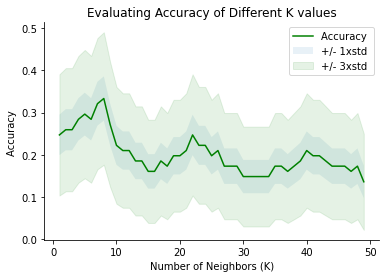

The best accuracy was 0.3333333333333333 with k= 8


[0.41463415 0.41463415 0.41463415 0.425      0.35       0.4
 0.425      0.35       0.475      0.675     ] 

Mean accuracy: 0.434390243902439


In [9]:
# *** Question 3b ***
'''
K-NN Classification

For the classification and clustering algorithms, I switched from using the fossil fuel vs renewable energy dataset
(cat_df) to the all energy sources (all_years) dataset, as I wanted to have a holistic view of the dataset. 
In doing K-NN classification, I was trying to identify whether the different energy sources have 
intrinsic properties that a model could pick up on. Because there are many variables in the usage of a certain 
type of energy source, I thought using just a relative percentage would prevent over-fitting and allow all the 
variables to be implicitly included.


Steps:
1. Create dataset with columns of year, percent, energy source
2. Do K-NN Classification
'''

#Step 1: Create dataset with columns of year, percent, energy source
all_years.reset_index(inplace=True) #Make year a column that can be used as x axis
to_group_df = all_years.set_index('Year')
to_group_df = to_group_df.stack().reset_index(level=1, name='Percent').rename(columns={'level_1':'Energy Source'})[['Percent','Energy Source']]
to_group_df.reset_index(inplace=True)


#Step 2: Do K-NN Classification
#Create X and Y variables
X = to_group_df[['Year', 'Percent']].values 
y = to_group_df[['Energy Source']].values

#Need to convert Energy Source to Numeric
from sklearn import preprocessing
label_encoder_energy = preprocessing.LabelEncoder()
label_encoder_energy.fit(['Coal', 'Other Biomass', 'Other', 'Wind', 'Hydro', 'Solar', 'Geothermal', 'Nuclear', 'Petroleum','Pumped Storage','Wood and Wood Derived Fuels','Natural Gas','Other Gases'])
y = label_encoder_energy.transform(y)

#Normalize data
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

#Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

#Build model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
  
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

#Plot model accuracy for different K-Values
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.title('Evaluating Accuracy of Different K values')
sns.despine(right=True) #Remove line on the right
plt.show()
plt.close()

#Identify best K-Value
print( "The best accuracy was", mean_acc.max(), "with k=", mean_acc.argmax()+1)
print('\n')


#With K-fold cross validation
from sklearn.model_selection import cross_val_score
true_neigh = KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1)
true_scores = cross_val_score(true_neigh, X, y, cv= 10)


#Evaluate accuracy of K-Fold Cross Validation

print(true_scores, "\n")
print("Mean accuracy:", np.mean(true_scores))


Questions for B:

Analysis of K-NN Classification

1. Objective and Rationale:

For the classification and clustering algorithms, I switched from using the fossil fuel vs renewable energy dataset
(cat_df) to the all energy sources (all_years) dataset, as I wanted to have a holistic view of the dataset. 
In doing K-NN classification, I was trying to identify whether the different energy sources have 
intrinsic properties that a model could pick up on. Because there are many variables in the usage of a certain 
type of energy source, I thought using just a relative percentage would prevent over-fitting and allow all the 
variables to be implicitly included.

2. Steps of Implementing the Algorithm with regards to the context:

For the K-NN classification model, I first organized the data with columns of year, percent, and energy source so that I could use all 3 features in the K-NN classification model. I then converted energy source from a categorical to a numerical value so that the K-NN Classification model could assign numeric classes to the data. I did this by using the LabelEncoder() method. I also normalized my data to improve the accuracy of the K-NN Classification Model. I did this by using the StandardScaler().fit.transform() method available for K-NN Classification models. After I finished such preprocessing, I then optimized my model by finding the best K value. I did this by creating K-NN classification models with K values from 1-49 and identifying the K value that yielded the highest Jaccard score. These individual models were trained using a train/test split with a test_size = 0.2. After I calculate the optimal K value, I created a K-NN classification model using this optimal K value and K-fold cross validation (another method to improve the accuracy of my model). I then evaluated the accuracy of this K-NN Classification model by calculating the mean jaccard score of the different folds.


3. Interpretation of the results and prediction accuracy achieved:

I was incorrect in believing that the different types of energy sources had intrinsic differentiators that a model
could pick up. Even though I optimized the K-value and performed K-Fold cross validation to improve the accuracy
of the model, the model still had a mean accuracy of ~0.35, which is low. This result suggests that I have an 
incomplete view of the factors affecting relative energy sources in CA and that I need to conduct further research
in order to have a complete holistic view of the situation and allow a model to be accurate.

4. Performance improvement techniques and improved accuracy achieved:

I did improve the accuracy of my model by using some preprocessing (fit_transform) in order to standardize my data. I was able to improve the accuracy of my model by optimizing both the K value of my model and using K fold cross validation. I optimized the K value of my model by creating K-NN classification models with K values from 1-49 and identifying the K value that yielded the highest Jaccard score. By using this optimal K value in my final K-NN classification model, I was able to improve the accuracy of the model. I also improved the accuracy of the model using K-fold cross validation, which provided a greater accuracy than the train/test split used for the polynomial model.

The K-NN Classification model building finished in 0.2 seconds. I did convert energy sources to a numerical value by using the LabelEncoder() method so that my K-NN Classification model could work.

### c) Clustering
I implemented K-Means Clustering

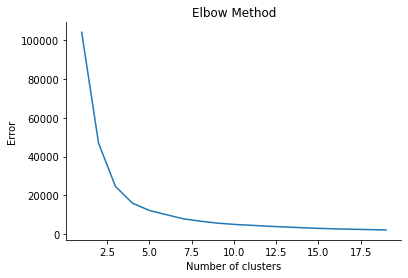

Elbow Point:  4


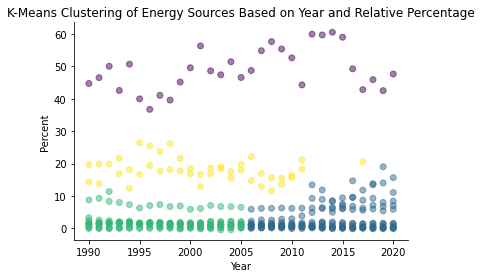

In [10]:
# *** Question 3c ***
'''
K-Means Clustering

Because I am using the all_years dataset, which has a value for each energy source in CA for each year from 1990
-2020, my dataset was ~400 rows long. So, I was not able to use any form of hierarchical clustering, as it would
have been too slow and would have created a complicated and cluttered dendrogram, though it would have provided
insight into how important the year and type of energy source were as factors in relative usage. Instead, I used
K-Means Clustering. My main goal with K-Means Clustering was to see if the model would be able to group the energy
sources together without any labeling (an extension of the intrinsic properties of the energy sources investigated
with the K-Means Classification Model).

Steps:
1. Use to_group_df as dataset for training + testing
2. Do K-Means clustering w/ K-Fold cross Validation
'''

#Define X
X_cluster = to_group_df[['Year', 'Percent']].values 

#Pre-processing
from sklearn.preprocessing import StandardScaler
X_cluster = np.nan_to_num(X_cluster)
Cluster_dataset = StandardScaler().fit_transform(X_cluster)

#Build model
from sklearn.cluster import KMeans
#Find optimal n_clusters
elbow_data_pts = []
for num in range(1, 20):
    k_means = KMeans(init = "k-means++", n_clusters = num, n_init = 20)
    k_means.fit(X_cluster)
    elbow_data_pts.append(k_means.inertia_) #Error
    
#Plot elbow graph
plt.plot(range(1, 20), elbow_data_pts)
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.title('Elbow Method')
sns.despine(right=True) #Remove line on the right
plt.show()
plt.close()

#Calculate elbow pt
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, 20), y = elbow_data_pts, curve = "convex", direction = "decreasing")
elbow_pt = kneedle.elbow
print('Elbow Point: ', elbow_pt)


#Do K-Means Cluster w/ optimal n_clusters
true_k_means = KMeans(init = "k-means++", n_clusters = elbow_pt, n_init = 20)
true_k_means.fit(X_cluster)


#Visualize K-Means Cluster

labels = true_k_means.labels_
plt.scatter(X_cluster[:, 0], X_cluster[:, 1], c=labels.astype(float), alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Percent')
plt.title("K-Means Clustering of Energy Sources Based on Year and Relative Percentage")
sns.despine(right=True) #Remove line on the right
plt.show()
plt.close()

Questions for C:

Analysis of K-Means Clustering

1. Objective and Rationale:

Because I am using the all_years dataset, which has a value for each energy source in CA for each year from 1990
-2020, my dataset was ~400 rows long. So, I was not able to use any form of hierarchical clustering, as it would
have been too slow and would have created a complicated and cluttered dendrogram, though it would have provided
insight into how important the year and type of energy source were as factors in relative usage. Instead, I used
K-Means Clustering. My main goal with K-Means Clustering was to see if the model would be able to group the energy
sources together without any labeling (an extension of the intrinsic properties of the energy sources investigated
with the K-Means Classification Model).

2. Steps of Implementing the Algorithm with regards to the context:

For the K-Means Clustering model, I first standardized my data in order to improve the accuracy of the model. I did this by using the StandardScaler.fit_transform() method available for K-Means Clusters models. This standardization was the extent of my preprocessing. Before building my final K-Means Cluster model, I optimized the model by using the elbow method to determine the optimal number of clusters. By using the elbow method, I was able to calculate the number of clusters that would yield the minimum error (jaccard error) as well as the error that a K-Means Clustering model built with that number of clusters would have. Finally, I built a K-Means Clustering model based on the value I calculated using the elbow method.


3. Interpretation of the results and prediction accuracy achieved:

Based on my results with K-NN Classification, I believed that the K-Means Clustering model would not be accurate,
as I had already realized that there are certain variables that I had not considered. I did use the elbow method
to find the best value of K for the K-Means Clustering model (in order to improve accuracy), but this k value did 
have a high error. The results showed that the model grouped mainly by percentage, which I did expect. After 
creating both K-NN Classification and K-Means Clustering models, I fully realized that I would need to add more 
variables to the dataset in order to improve the accuracy of the model.

4. Performance improvement techniques and improved accuracy achieved:

I did improve the accuracy of my model by using some preprocessing (fit_transform) in order to standardize my data. However, the main way I was able to improve the accuracy of my K-Means Clustering model was by using the elbow method to calculate the optimal number of clusters that would return the least error (jaccard error). 


The K-Means Clustering model building took 1.7 seconds to run.

### 3) Choose the best model and present the results: 
- k-NN regression with k = 2 had the highest accuracy out of all the algorithms tested, so it will be used to predict when California will be 100% powered by renewables.

In [11]:
# *** Question 4c *** Answering Research Question 1: When will CA be 100% powered by renewables?
#K-NN Regression
from sklearn.neighbors import KNeighborsRegressor

def k_nn_regextend(col):
    X = np.asanyarray(cat_df[['Year']])
    y = np.asanyarray(cat_df[[col]])

    #Build model with best K value
    knn=KNeighborsRegressor(n_neighbors=2) #Already know this from previous implementation
    knn.fit(X, y)
    
    years_extended = np.arange(1990, 2100, 1)
    years_extended = years_extended.reshape(-1, 1)
    print(knn.predict(years_extended))

k_nn_regextend('Renewable Energy')



[[46.64799105]
 [46.64799105]
 [44.86753926]
 [46.55267764]
 [45.95298832]
 [48.07574253]
 [55.49163862]
 [54.73822162]
 [53.79503973]
 [52.04580676]
 [47.09668229]
 [41.7525357 ]
 [42.30537668]
 [46.51809037]
 [45.02263407]
 [45.44782233]
 [47.15304288]
 [43.32560117]
 [38.93255094]
 [38.73435437]
 [41.32560467]
 [47.02269398]
 [43.69000705]
 [36.4707103 ]
 [36.34996506]
 [36.81529511]
 [42.80204099]
 [51.15703839]
 [52.78108153]
 [52.86038054]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946

In [12]:
"""
Analysis: K-NN regression has the highest training accuracy but it is unable to predict future values beyond 2020.
So, even though polynomial regression has a lower accuracy than K-NN regression, it will be used to answer the 
research questions.
"""

'\nAnalysis: K-NN regression has the highest training accuracy but it is unable to predict future values beyond 2020.\nSo, even though polynomial regression has a lower accuracy than K-NN regression, it will be used to answer the \nresearch questions.\n'

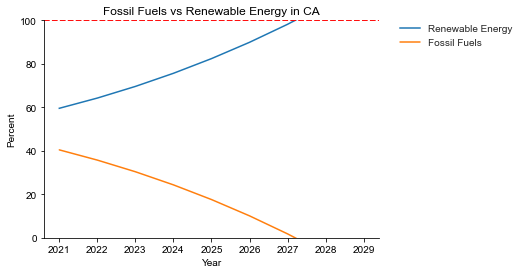

In [13]:
# *** Question 4c *** Answering Research Question 1: When will CA be 100% powered by renewables?
#Polynomial Regression For Renewable Energy
from sklearn.preprocessing import PolynomialFeatures

def poly(col):
    #Build model based on degree = 3 from earlier
    poly = PolynomialFeatures(degree=3, include_bias=False)
    poly_reg_model = linear_model.LinearRegression()
    train_x = np.asanyarray(cat_df[['Year']])
    train_y = np.asanyarray(cat_df[[col]])
    poly_features = poly.fit_transform(train_x.reshape(-1, 1))
    poly_reg_model.fit(poly_features, train_y)
    train_y_ = poly_reg_model.predict(poly_features)
    
    #Make and plot prediction
    years_extended = np.arange(2021, 2030, 1) #Prediction for next 10 years
    years_extended_transformed = poly.fit_transform(years_extended.reshape(-1, 1))
    prediction = poly_reg_model.predict(years_extended_transformed)
    plt.plot(years_extended, prediction, label = col)
    plt.xlabel('Year')
    plt.ylabel('Percent')
    plt.title('Fossil Fuels vs Renewable Energy in CA')
    plt.ylim(0, 100)
    sns.set_style('white') #Set background to just white
    sns.despine(right=True) #Remove line on the right
    plt.axhline(y = 100, color = 'r', linestyle = '--') #Show when 100% renewables in achieved
    plt.legend(frameon=False, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    
#Do Polynomial Regression for Fossil Fuel + Renewable Energy
poly('Renewable Energy')
poly('Fossil Fuels')


In [14]:
"""
Analysis of Results:
Polymomial Regression is limited in that Renewable Energy usage cannot go beyond 100%. So, all values over 100%
must be disregarded. However, this polynomial regression does suggest that between 2027 and 2028 (beginning of 2028)
, California will be 100% powered by renewables. Because the regression uses polynomial of degree 3, the values for
renewables increase at an exponential rate. Thus, a 100% value for renewables is likely after 2027-2028, though the
large percentage increase of solar (~7000% in the last 8 years) may counteract this.
"""

'\nAnalysis of Results:\nPolymomial Regression is limited in that Renewable Energy usage cannot go beyond 100%. So, all values over 100%\nmust be disregarded. However, this polynomial regression does suggest that between 2027 and 2028 (beginning of 2028)\n, California will be 100% powered by renewables. Because the regression uses polynomial of degree 3, the values for\nrenewables increase at an exponential rate. Thus, a 100% value for renewables is likely after 2027-2028, though the\nlarge percentage increase of solar (~7000% in the last 8 years) may counteract this.\n'

In [15]:
"""
Types of Renewable Energy: Let's further investigate the rest of the energy sources using this model. Note that the
energy sources which did not have a max value >= 5 from 1990 - 2020 were not included, as they cluttered the 
following graph.
"""

"\nTypes of Renewable Energy: Let's further investigate the rest of the energy sources using this model. Note that the\nenergy sources which did not have a max value >= 5 from 1990 - 2020 were not included, as they cluttered the \nfollowing graph.\n"

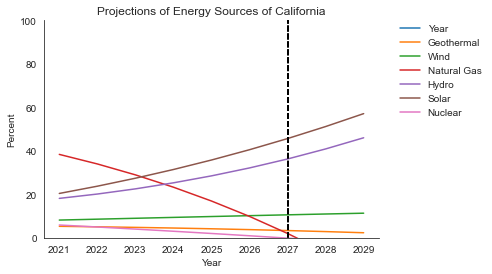

In [16]:
# *** Question 4c ***
"""
Answering Research Question 2: What will be the relative usages of different energy types the year that CA is 100%
powered by renewables?
"""
#Polynomial Regression For Solar and Natural Gas
from sklearn.preprocessing import PolynomialFeatures

def poly_all(col):
    #Build model
    poly = PolynomialFeatures(degree=3, include_bias=False)
    poly_reg_model = linear_model.LinearRegression()
    train_x = np.asanyarray(cat_df[['Year']])
    train_y = np.asanyarray(all_years[[col]])
    poly_features = poly.fit_transform(train_x.reshape(-1, 1))
    poly_reg_model.fit(poly_features, train_y)
    train_y_ = poly_reg_model.predict(poly_features)
    
    #Make and plot prediction
    years_extended = np.arange(2021, 2030, 1) #Prediction for next 10 years
    years_extended_transformed = poly.fit_transform(years_extended.reshape(-1, 1))
    prediction = poly_reg_model.predict(years_extended_transformed)
    plt.plot(years_extended, prediction, label = col)
    plt.xlabel('Year')
    plt.ylabel('Percent')
    plt.title('Projections of Energy Sources of California')
    plt.ylim(0, 100)
    plt.axvline(x = 2027, color = 'black', linestyle = '--') #Show relative %s when CA is 100% renewables
    sns.set_style('white') #Set background to just white
    sns.despine(right=True) #Remove line on the right
    plt.legend(frameon=False, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    
#Do Polynomial Regression for Fossil Fuel + Renewable Energy
l = [] #Empty list
all_years_to_plot = all_years.loc[:, all_years.max() >= 5] #Max >= 5%
for col in all_years_to_plot: #Only plotting the major energy sources (1990 - 2020 max >= 5%) so that the graph is not crowded
    l.append(col)
l #List of all energy sources
for source in l:
    poly_all(str(source))

### Improving Accuracy & Moving forward: 
       1. Identify more variables that affect the relative usage of different energy types in CA (e.g. political
       ideology, GDP, useable area of state, etc..) and add them to the database & models.
          a. This would generalize the model more and allow it to be applied to different states & countries.
          
       2. Test these models with data of different states & countries in order to identify whether the data is     over-fit or needs more variables to be accurate.
       
       3. Add data from 2021 and 2022 to improve the accuracy of the model.
       
       4. Use more algorithms (e.g. neural network, logistic regression) in order to improve the accuracy of the chosen model by evaluating more model options.

## Question 5: State the Overall insights obtained from the implemented project

#### Insights from Models:



Out of the 3 regression algorithms (linear, polynomial, K-NN Regression), K-NN Regression has the highest accuracy with a MSE of 13.39 and an R2 score of 0.64. However, this is still not a very high accuracy. This is because the dataset is very small (only 30 rows).



K-NN regression has the highest training accuracy but it is unable to predict future values beyond 2020.
So, even though polynomial regression has a lower accuracy than K-NN regression, it is more useful for predicting future values. K-NN Regression is useful for predicting values that already lie in the training set range (e.g. 2015.1 in my case), which would make it good for predicting the energy source production in CA for a specific month from 1990 - 2020 (though there is already an EIA dataset with these values).


K-Means Clustering is the least efficient algorithm. While the rest of the algorithms took 0.2 seconds to run, K-Means Clustering took 1.7 seconds to run. So, the unsupervised learning of K-Means Clusteruing comes with a performance cost.



No model can be accurate if it has a dataset with only 30 rows. Also, models cannot identify implicit variables unless there is a variety of features (having only 1 or 2 features is not enough). 


<br>
<br>





#### Insights from Results:

 

From 1990 to 2020, natural gas has been the overall largest source of California's energy (mean = 48.99%) and has even had a 6.56% increase in usage from 1990 to 2020. California's large usage of natural gas contributes to its high usage of fossil fuels, with 1996-1998 (when renewable energy was a higher proportion of California's energy than fossil fuels) all being years with natural gas at a proportion well below its mean. Thus, natural gas is a large factor in California's usage of fossil fuels. The same is true for solar and renewables. Between 1990 and 2020, solar had a 6989% increase in usage, most of which was since 2012. At the same time as solar's exponential growth, renewable energy had a large increase in its relative proportion of California's use.



Polymomial Regression is limited in that Renewable Energy usage cannot go beyond 100%. So, all values over 100%
must be disregarded. However, this polynomial regression does suggest that between 2027 and 2028 (beginning of 2028), California will be 100% powered by renewables. Because the regression uses polynomial of degree 3, the values for
renewables increase at an exponential rate. Thus, a 100% value for renewables is likely after 2027-2028, though the
large percentage increase of solar (~7000% in the last 8 years) may counteract this.



The polynomial regression model suggests that solar and hydro will be the most prominent renewables in 2027 (with solar being the most prominent renewable), when CA is 100% powered by renewables. The solar prediction aligns with the exponential increase (~700% in the last 8 years) that solar has had so far. However, from 1990 - 2020, hydro has had a ~23% decrease in relative usage, while wind has had a 322% increase in usage. This may be due to the model identifying an implicit variable related to hydro usage that is not immediately seen.